Bases on github.com/matthiasmengel/pism-ens-analysis output, 

* create aggregate indicators for regions
* find the best N runs for an indicator
* show the dependencies of indicators and highlight parameters with colors

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png',}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import netCDF4 as nc
import dimarray as da
import sys, os
import glob
import pandas as pd
import itertools
import glob
import collections
import seaborn as sns

In [4]:
plt.rcParams['figure.figsize'] = 16,14
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['font.sans-serif'] = [u"Liberation Sans"] + plt.rcParams['font.sans-serif']
plt.rcParams['svg.fonttype'] = 'none'

In [16]:
# Make the notebook cells take almost all available width
# More info:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


In [11]:
addpath = "/home/mengel/projects/pism-ens-analysis"
if addpath not in sys.path: sys.path.append(addpath)
import pism_ens_analysis.timeseries as ts; reload(ts)
import pism_ens_analysis.pism_ens_analysis as ea; reload(ea)

<module 'pism_ens_analysis.pism_ens_analysis' from '/home/mengel/projects/pism-ens-analysis/pism_ens_analysis/pism_ens_analysis.pyc'>

In [12]:
ensemble_indicator = pd.read_csv("data/dev_058_initmip8km_resoensemble4.csv", index_col=0)

ensemble_table = pd.read_csv("data/dev_058_initmip8km_resoensemble4.txt",
                             sep='\s+',index_col=0)

In [13]:
# divide each ensemble member by the median of the ensemble for a certain indicator.
# after this normalization, runs smaller 1 score better than the median
normalized_ens_indicator = ensemble_indicator.div(ensemble_indicator.median(axis=0),axis=1)

In [100]:
amundsen_cols = [ind for ind in normalized_ens_indicator.columns if "Amundsen" in ind ]
amundsen_total_indicator = normalized_ens_indicator.loc[:,amundsen_cols].product(axis=1)

ross_cols = [ind for ind in normalized_ens_indicator.columns if "Ross" in ind ]
# do not use thk anomaly for Ross
ross_total_indicator = normalized_ens_indicator.loc[:,['Ross Stream Velocity', 'Ross Grounded Area']].product(axis=1)

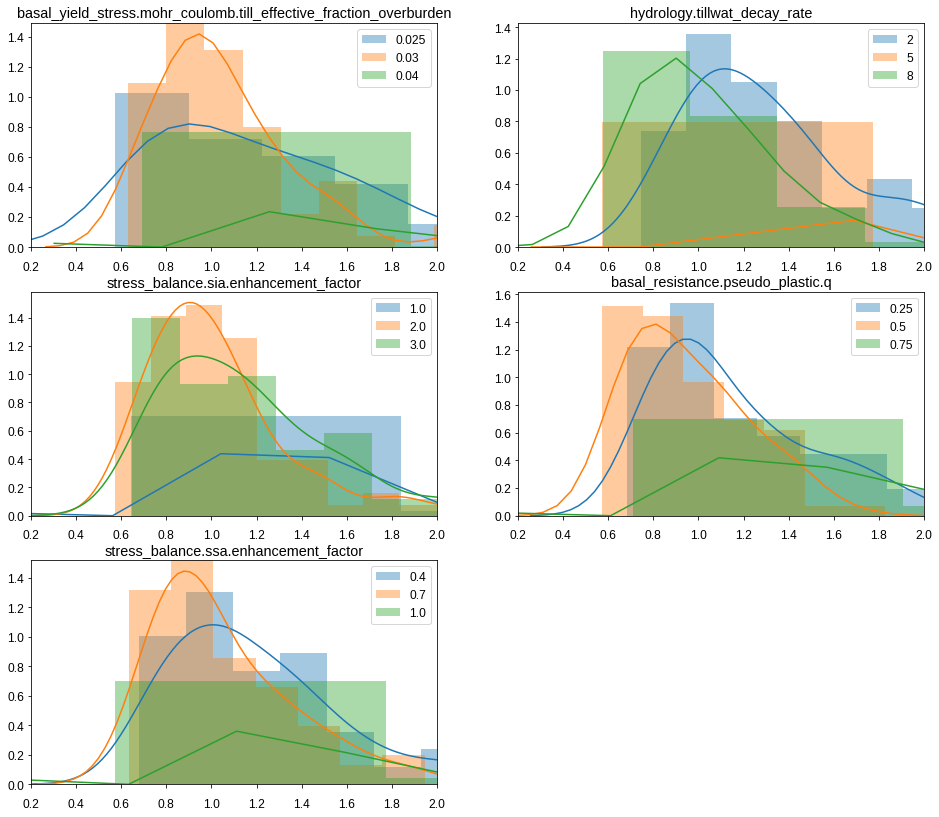

In [85]:
# Amundsen total indicator

# plot histograms per parameter value
axs = [plt.subplot(3,2,i+1) for i in np.arange(5)]

for i,param in enumerate(ensemble_table.columns):
    pvals = ensemble_table.loc[:,param].unique()
    pvals.sort()

    for pval in pvals:
        hashes = ea.return_hashes_with_paramval(ensemble_table, param, pval)
        sns.distplot(amundsen_total_indicator.loc[hashes],
                     ax = axs[i], axlabel="", label=str(pval))

    axs[i].set_title(param)
    axs[i].legend()
    axs[i].set_xlim([0.2,2])

In [103]:
# show best Amundsen runs
best_amundsen = amundsen_total_indicator.sort_values().index[0:10]
ensemble_table.loc[best_amundsen,:]

,basal_yield_stress.mohr_coulomb.till_effective_fraction_overburden,hydrology.tillwat_decay_rate,stress_balance.sia.enhancement_factor,basal_resistance.pseudo_plastic.q,stress_balance.ssa.enhancement_factor
hash,,,,,
8914b209,0.025,5,2.0,0.5,1.0
b25ae7a3,0.025,8,2.0,0.5,1.0
497084ff,0.030,5,2.0,0.5,1.0
26529d52,0.030,8,2.0,0.5,0.7
d052149e,0.030,5,1.0,0.5,1.0
9b2048ea,0.025,8,2.0,0.5,0.7
8d166888,0.030,5,3.0,0.5,1.0
393d07aa,0.030,8,3.0,0.5,1.0
b9aa7eb9,0.025,5,1.0,0.5,1.0


In [102]:
# show best Ross runs, they are disjunct from the Ross runs
best_ross = ross_total_indicator.sort_values().index[0:10]
ensemble_table.loc[best_ross,:]

,basal_yield_stress.mohr_coulomb.till_effective_fraction_overburden,hydrology.tillwat_decay_rate,stress_balance.sia.enhancement_factor,basal_resistance.pseudo_plastic.q,stress_balance.ssa.enhancement_factor
hash,,,,,
a0247953,0.025,2,3.0,0.75,1.0
368158ee,0.025,2,1.0,0.75,0.7
f7679d1d,0.025,2,2.0,0.75,0.7
25f58ad4,0.030,2,1.0,0.75,0.7
f2128f7c,0.030,2,3.0,0.75,0.7
6b47809e,0.025,2,3.0,0.75,0.7
15478f85,0.025,2,1.0,0.50,0.4
a24bb7b3,0.025,2,2.0,0.50,0.7
21bfc735,0.025,2,1.0,0.25,1.0


In [37]:
ensemble_table.columns

Index([u'basal_yield_stress.mohr_coulomb.till_effective_fraction_overburden',
       u'hydrology.tillwat_decay_rate',
       u'stress_balance.sia.enhancement_factor',
       u'basal_resistance.pseudo_plastic.q',
       u'stress_balance.ssa.enhancement_factor'],
      dtype='object')

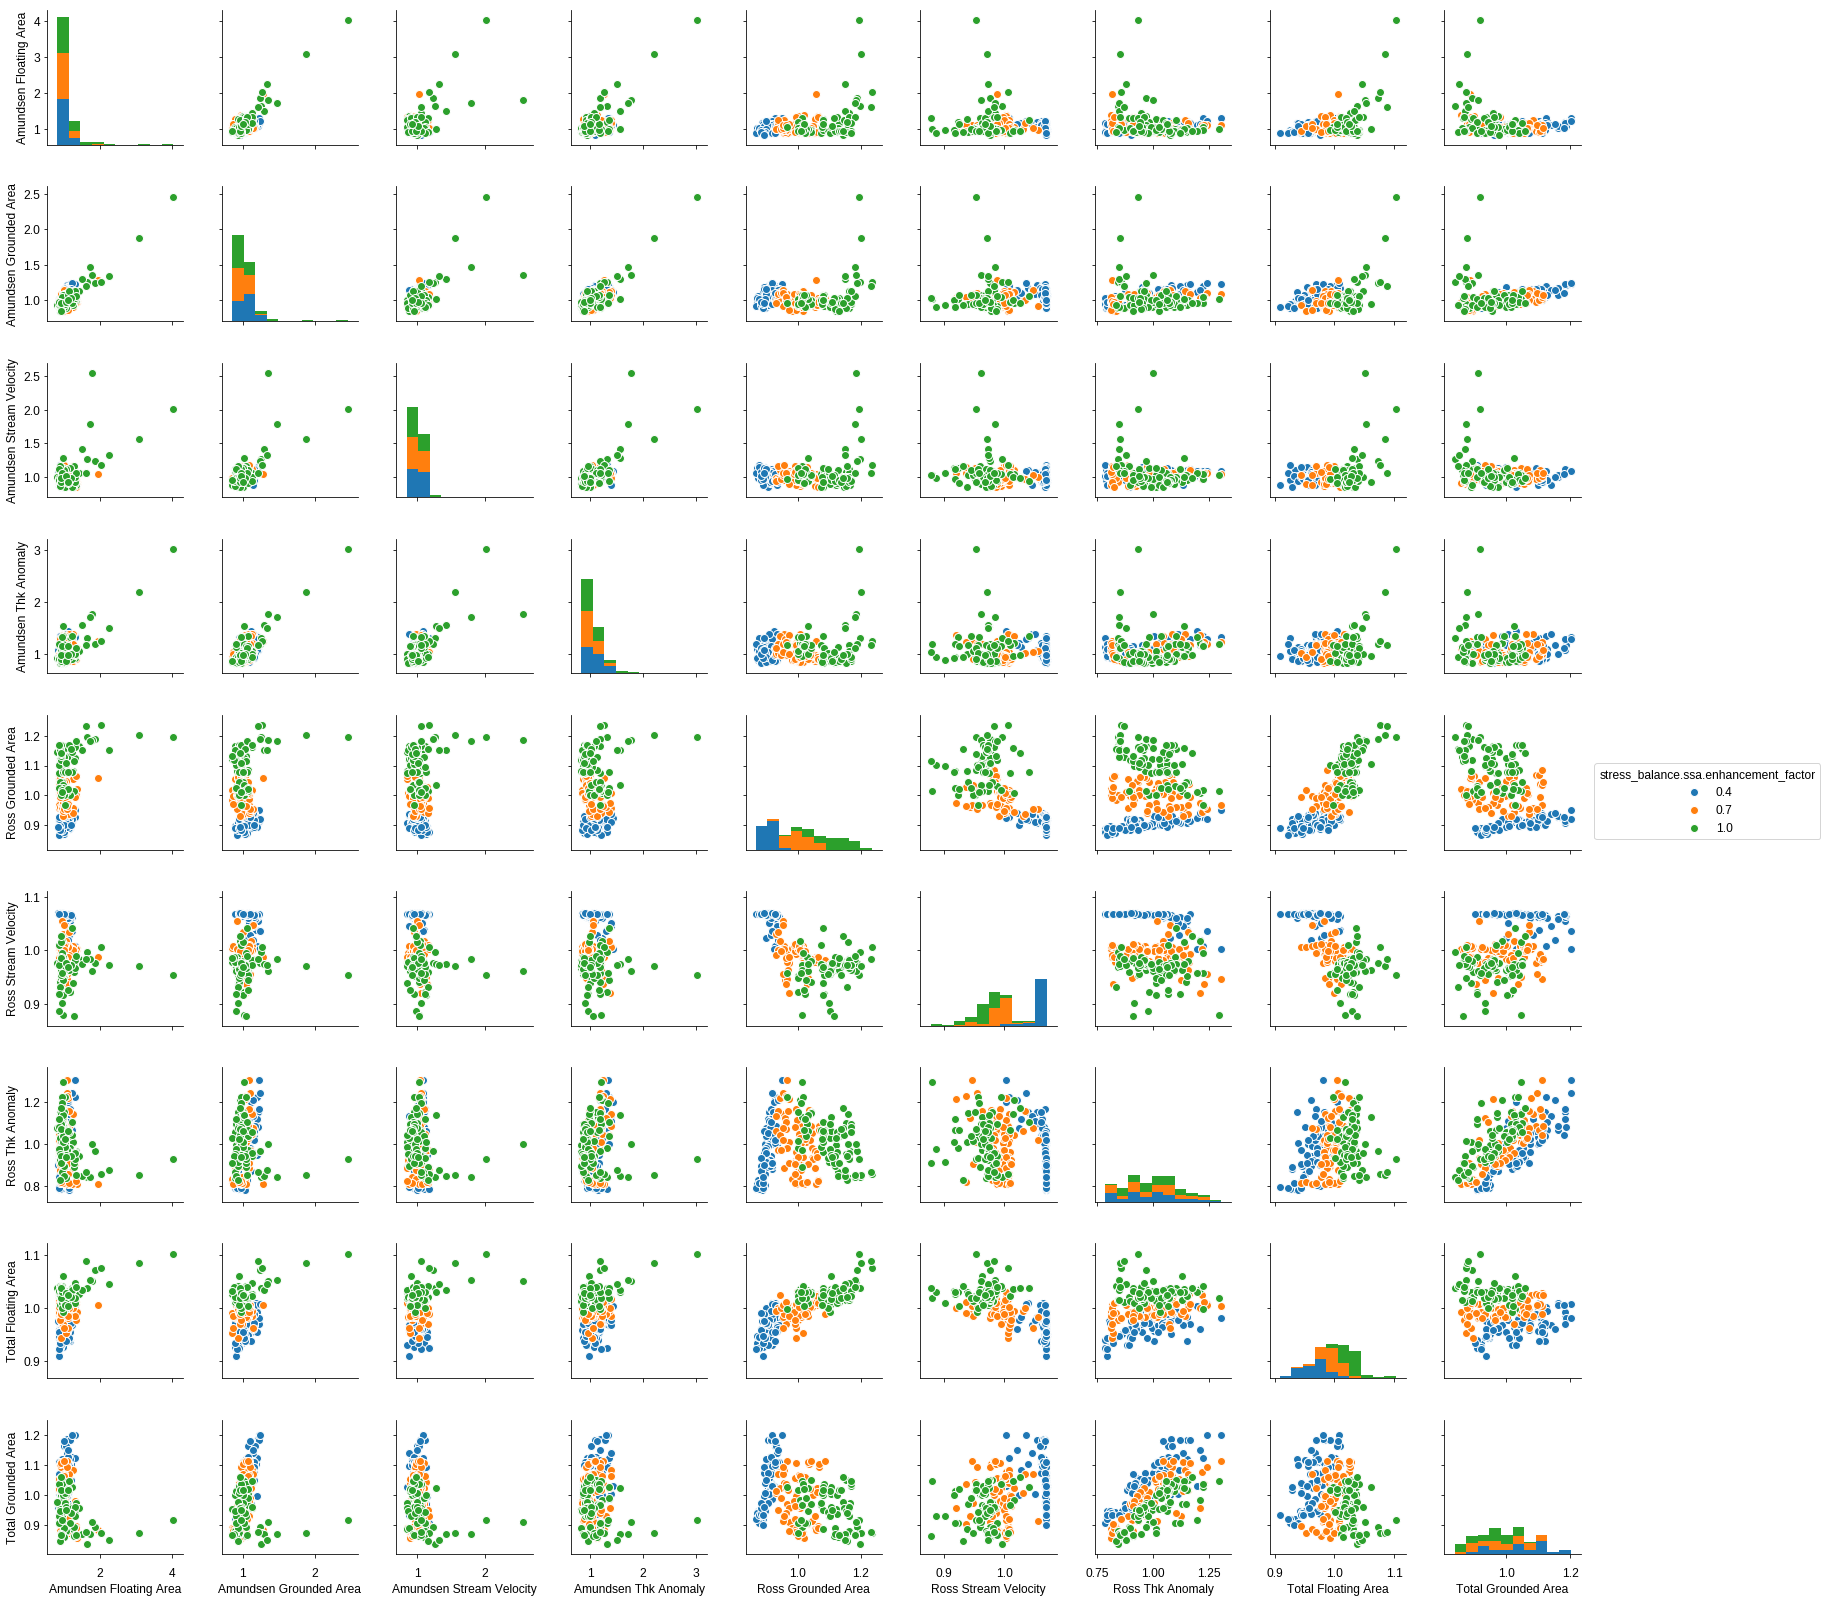

In [66]:
# Amundsen indicators wseem to be well correlated. or at least: if one fails, other fails as well
# Ross grounded area thk anomaly is best for low SSA values, but Ross stream velocity is worst. They are negatively correlated.
# Total floating area and Ross grounded area correlate, and are sorted by SSA value.

highlight = "stress_balance.ssa.enhancement_factor"
pp = sns.pairplot(pd.concat([normalized_ens_indicator,ensemble_table[highlight]],axis=1),hue=highlight,
             vars=sorted(normalized_ens_indicator.columns))

# set axis limits manually like this:
# for ax in pp.axes.flat:
#     ax.set_ylim(0.5,1.5)
#     ax.set_xlim(0.5,1.5)

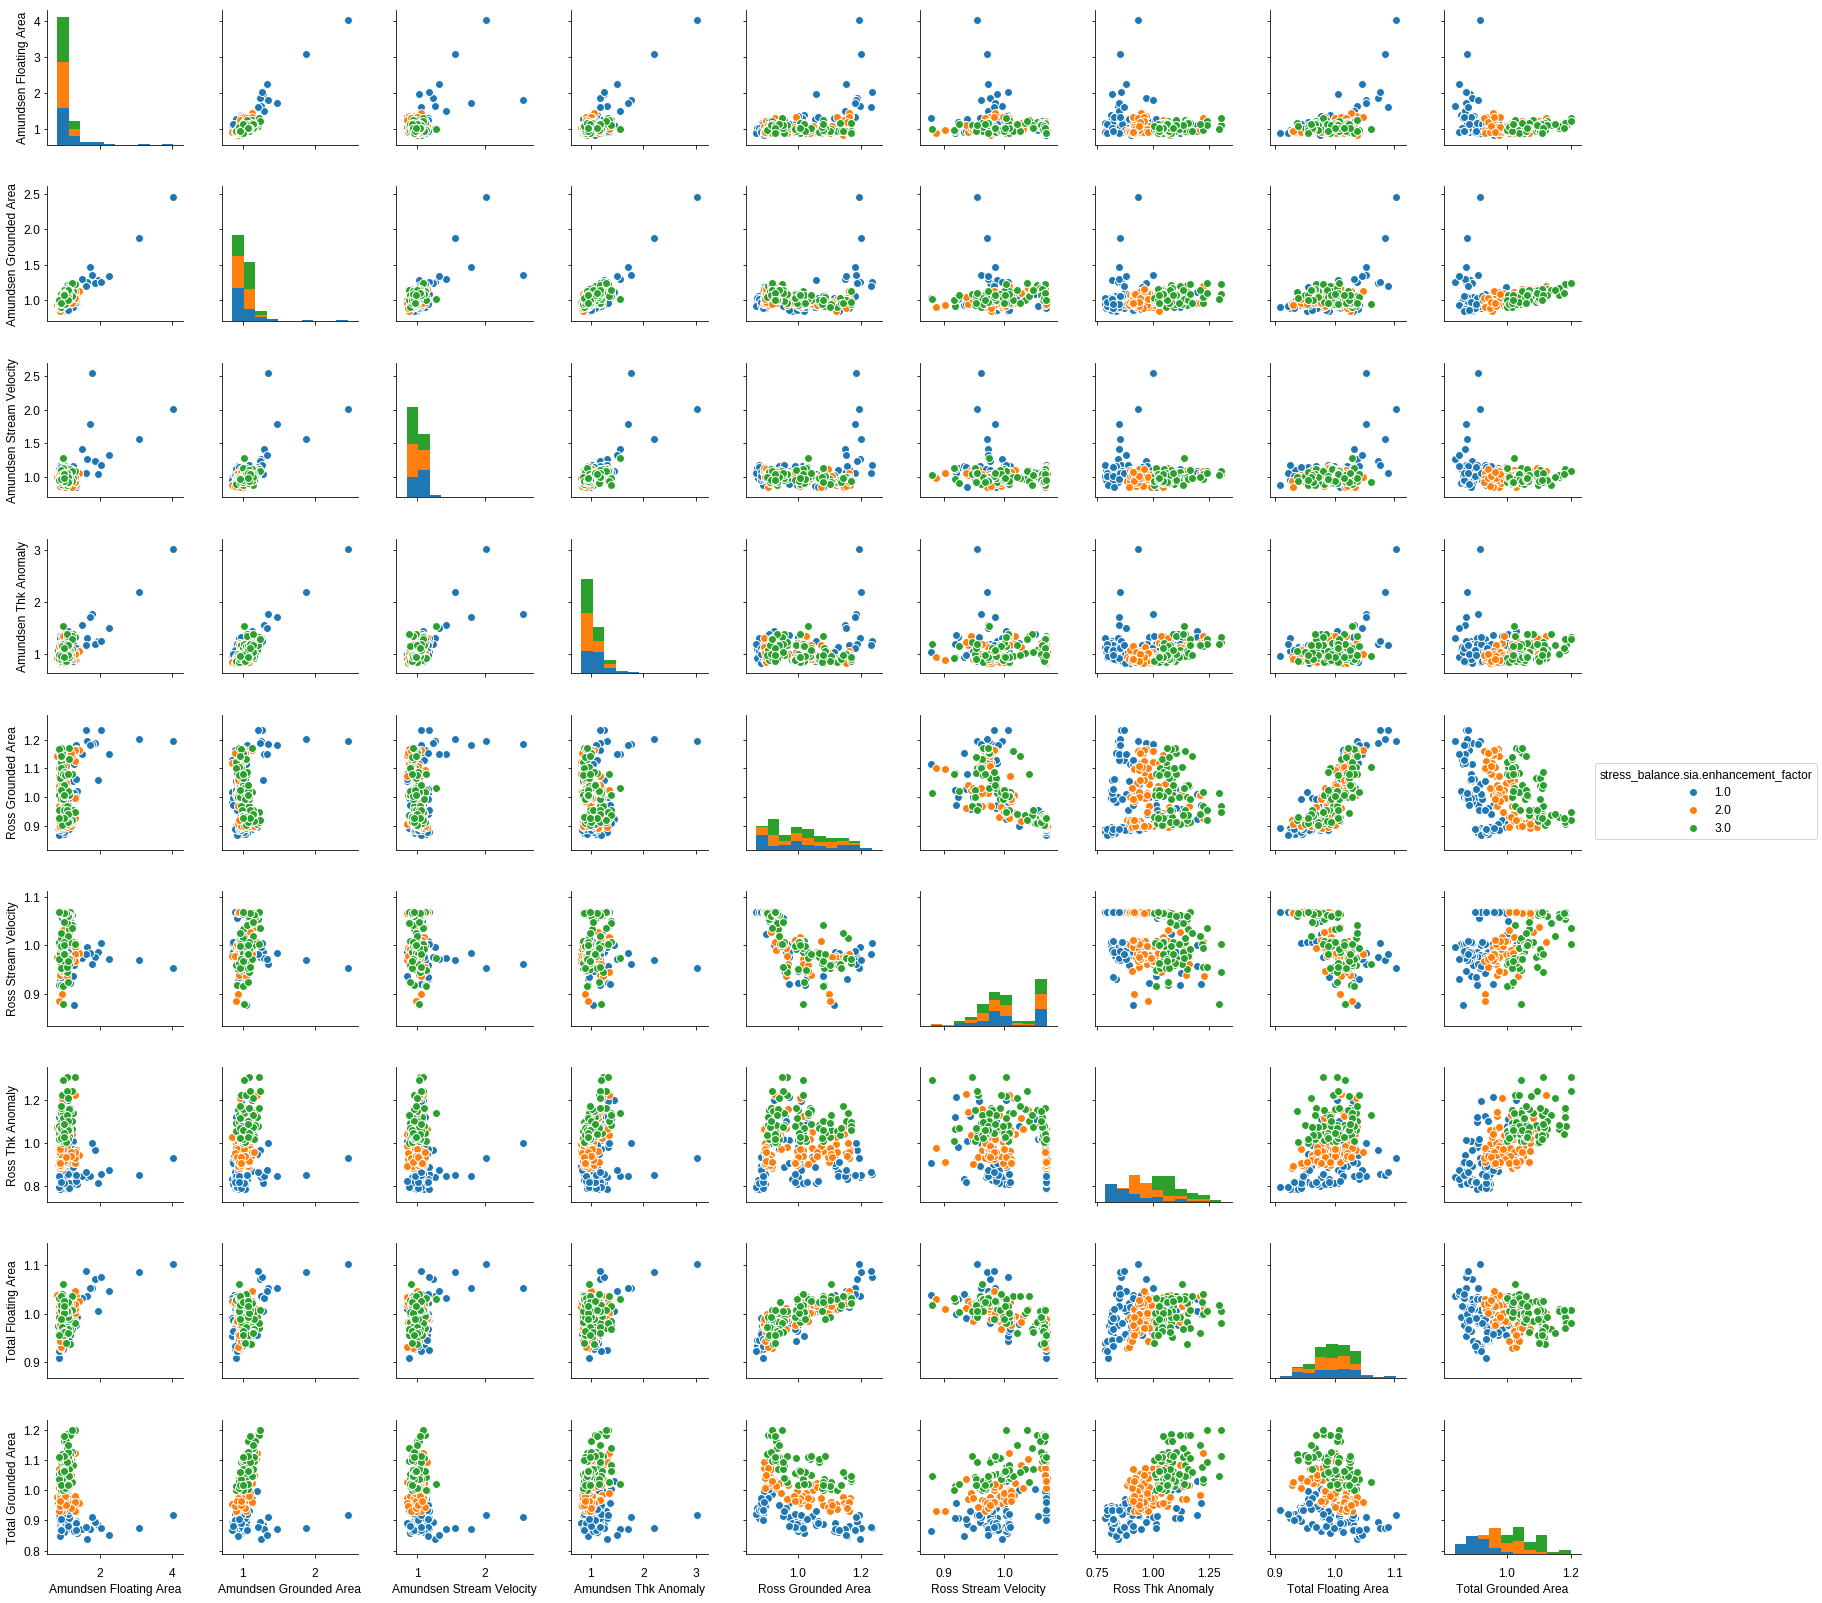

In [65]:
# SIA=1.0 runs are the ones with bad Amundsen scores. Possibly the ones that show Amundsen collapse
# total grounded area is best for SIA=1.0, Ross Thk anomaly as well.

highlight = "stress_balance.sia.enhancement_factor"
pp = sns.pairplot(pd.concat([normalized_ens_indicator,ensemble_table[highlight]],axis=1),hue=highlight,
             vars=sorted(normalized_ens_indicator.columns))

# set axis limits manually like this:
# for ax in pp.axes.flat:
#     ax.set_ylim(0.5,1.5)
#     ax.set_xlim(0.5,1.5)

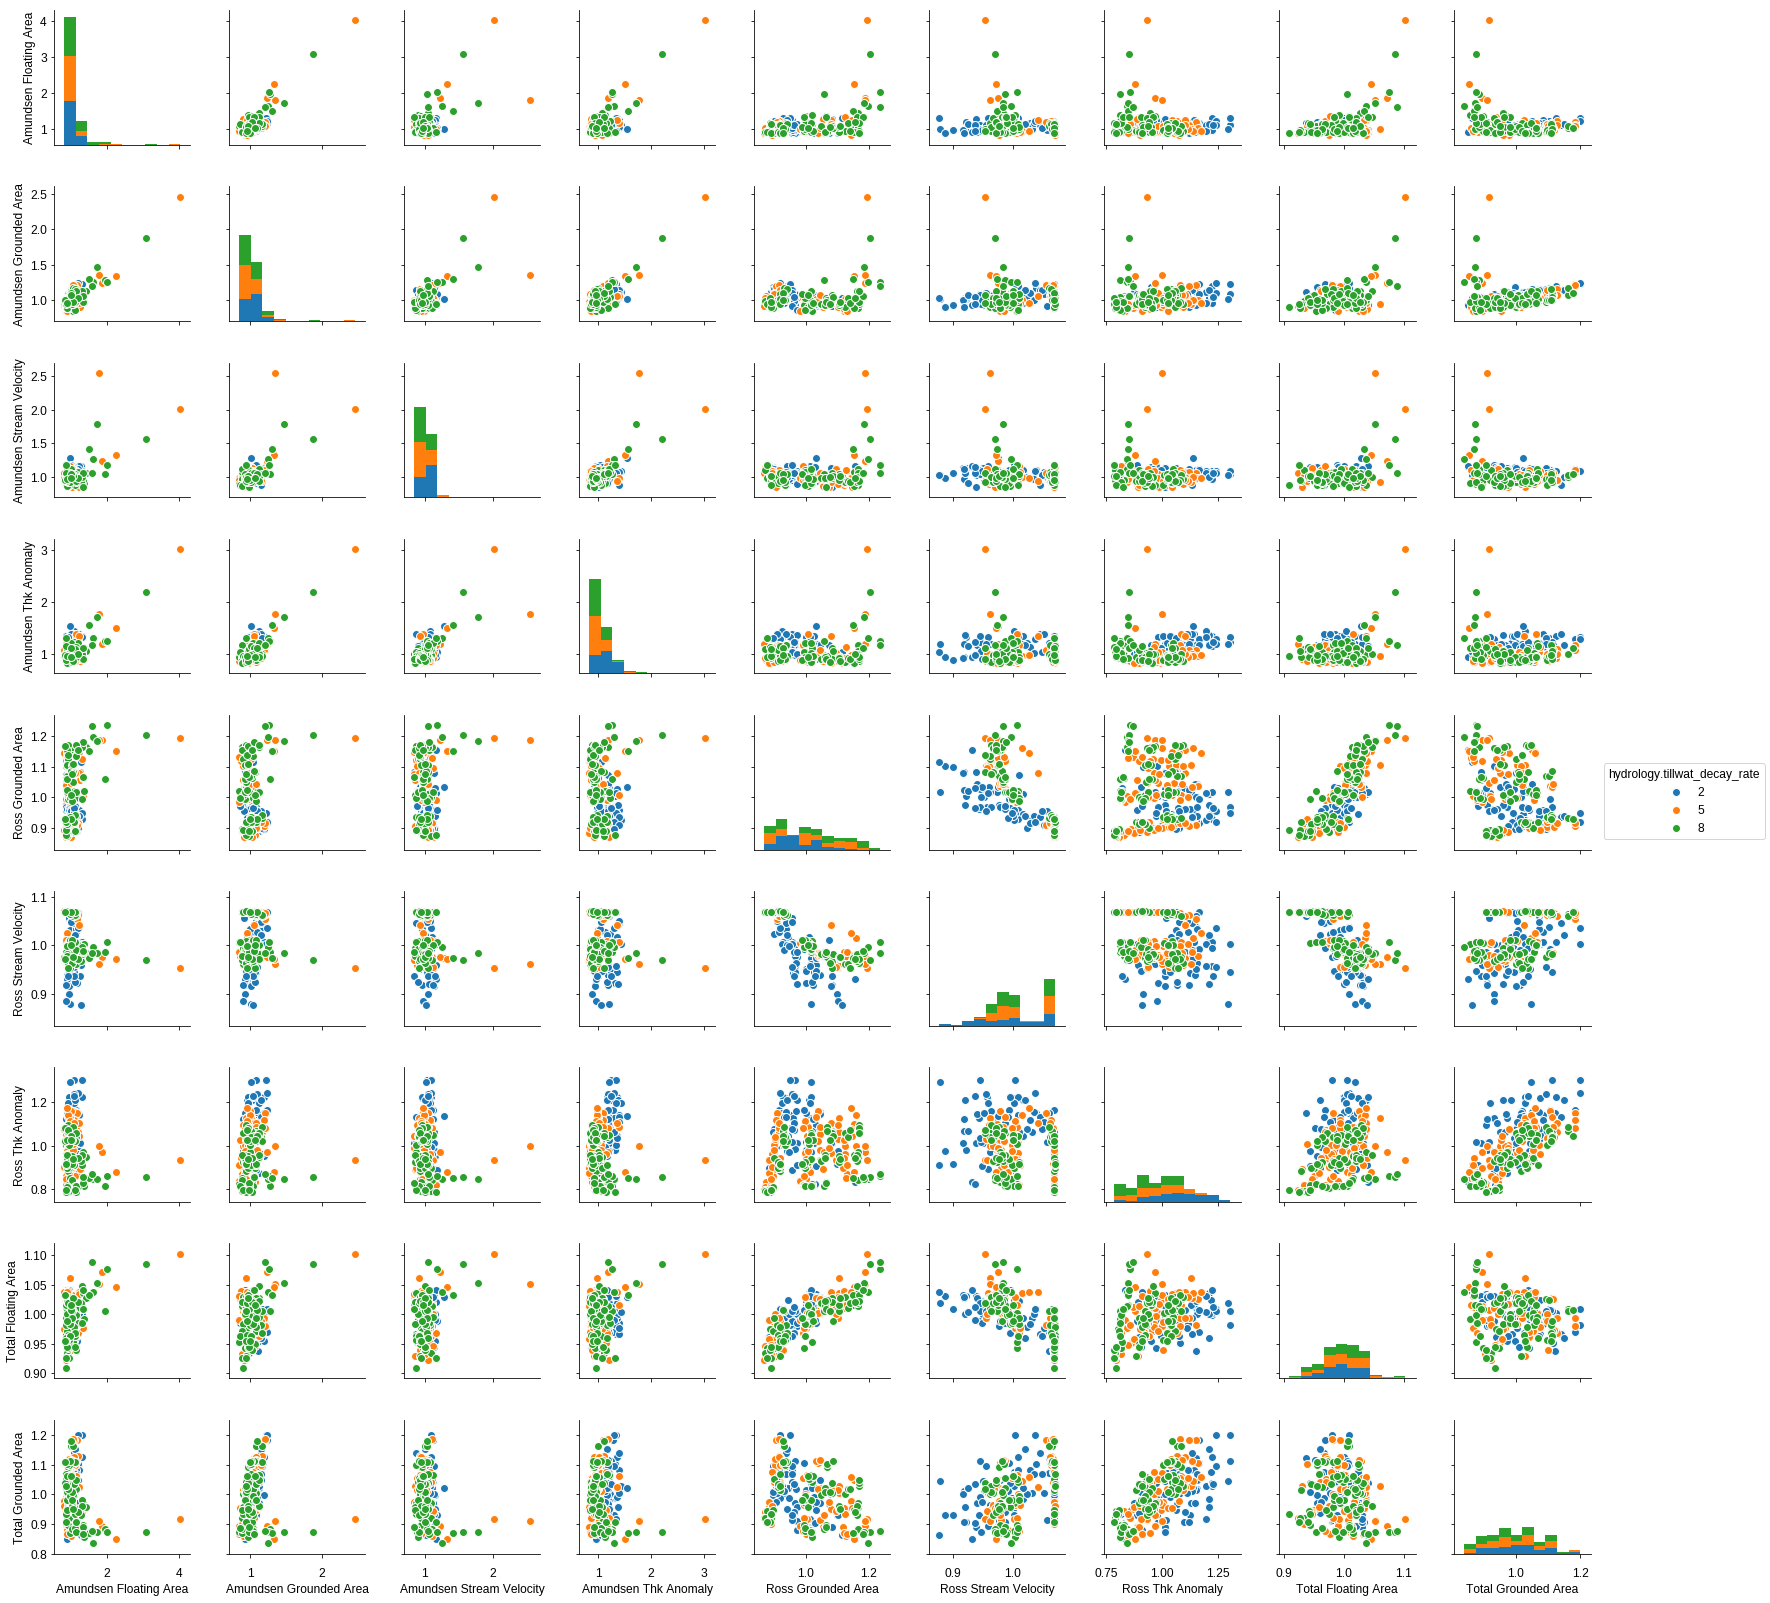

In [60]:
# decay rate = 2 shows best Ross streaming and Ross grounded Area
# no clear signal for Total grounded or floating area from decay rate.

highlight = "hydrology.tillwat_decay_rate"
pp = sns.pairplot(pd.concat([normalized_ens_indicator,ensemble_table[highlight]],axis=1),hue=highlight,
             vars=sorted(normalized_ens_indicator.columns))

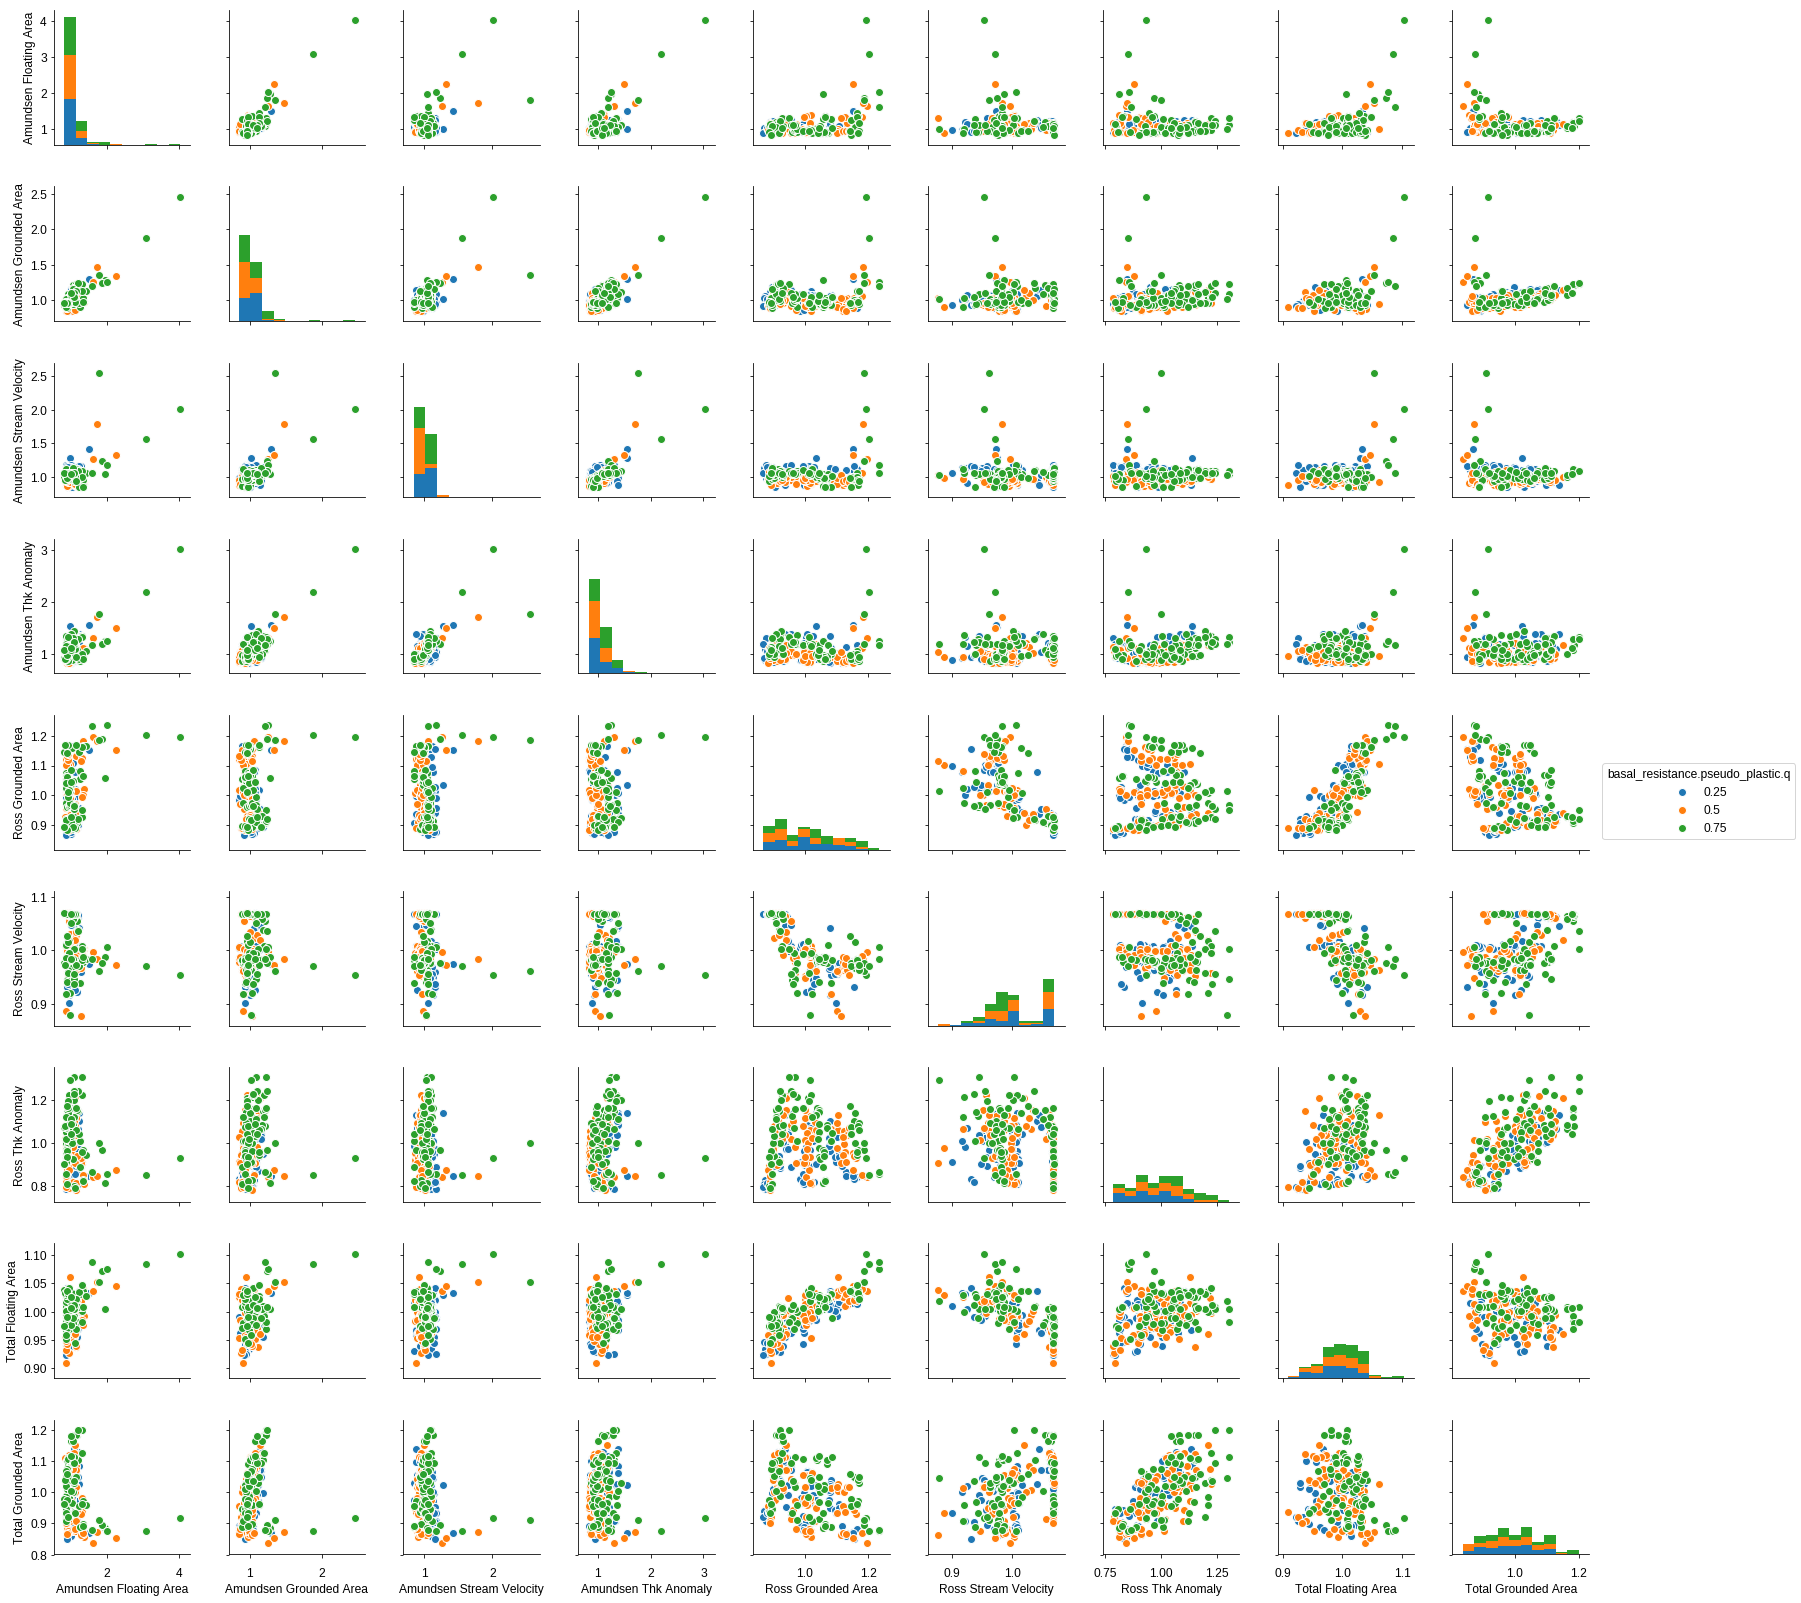

In [61]:
# ppq does seems the least important parameter. no clear patterns here.

highlight = "basal_resistance.pseudo_plastic.q"
pp = sns.pairplot(pd.concat([normalized_ens_indicator,ensemble_table[highlight]],axis=1),hue=highlight,
             vars=sorted(normalized_ens_indicator.columns))

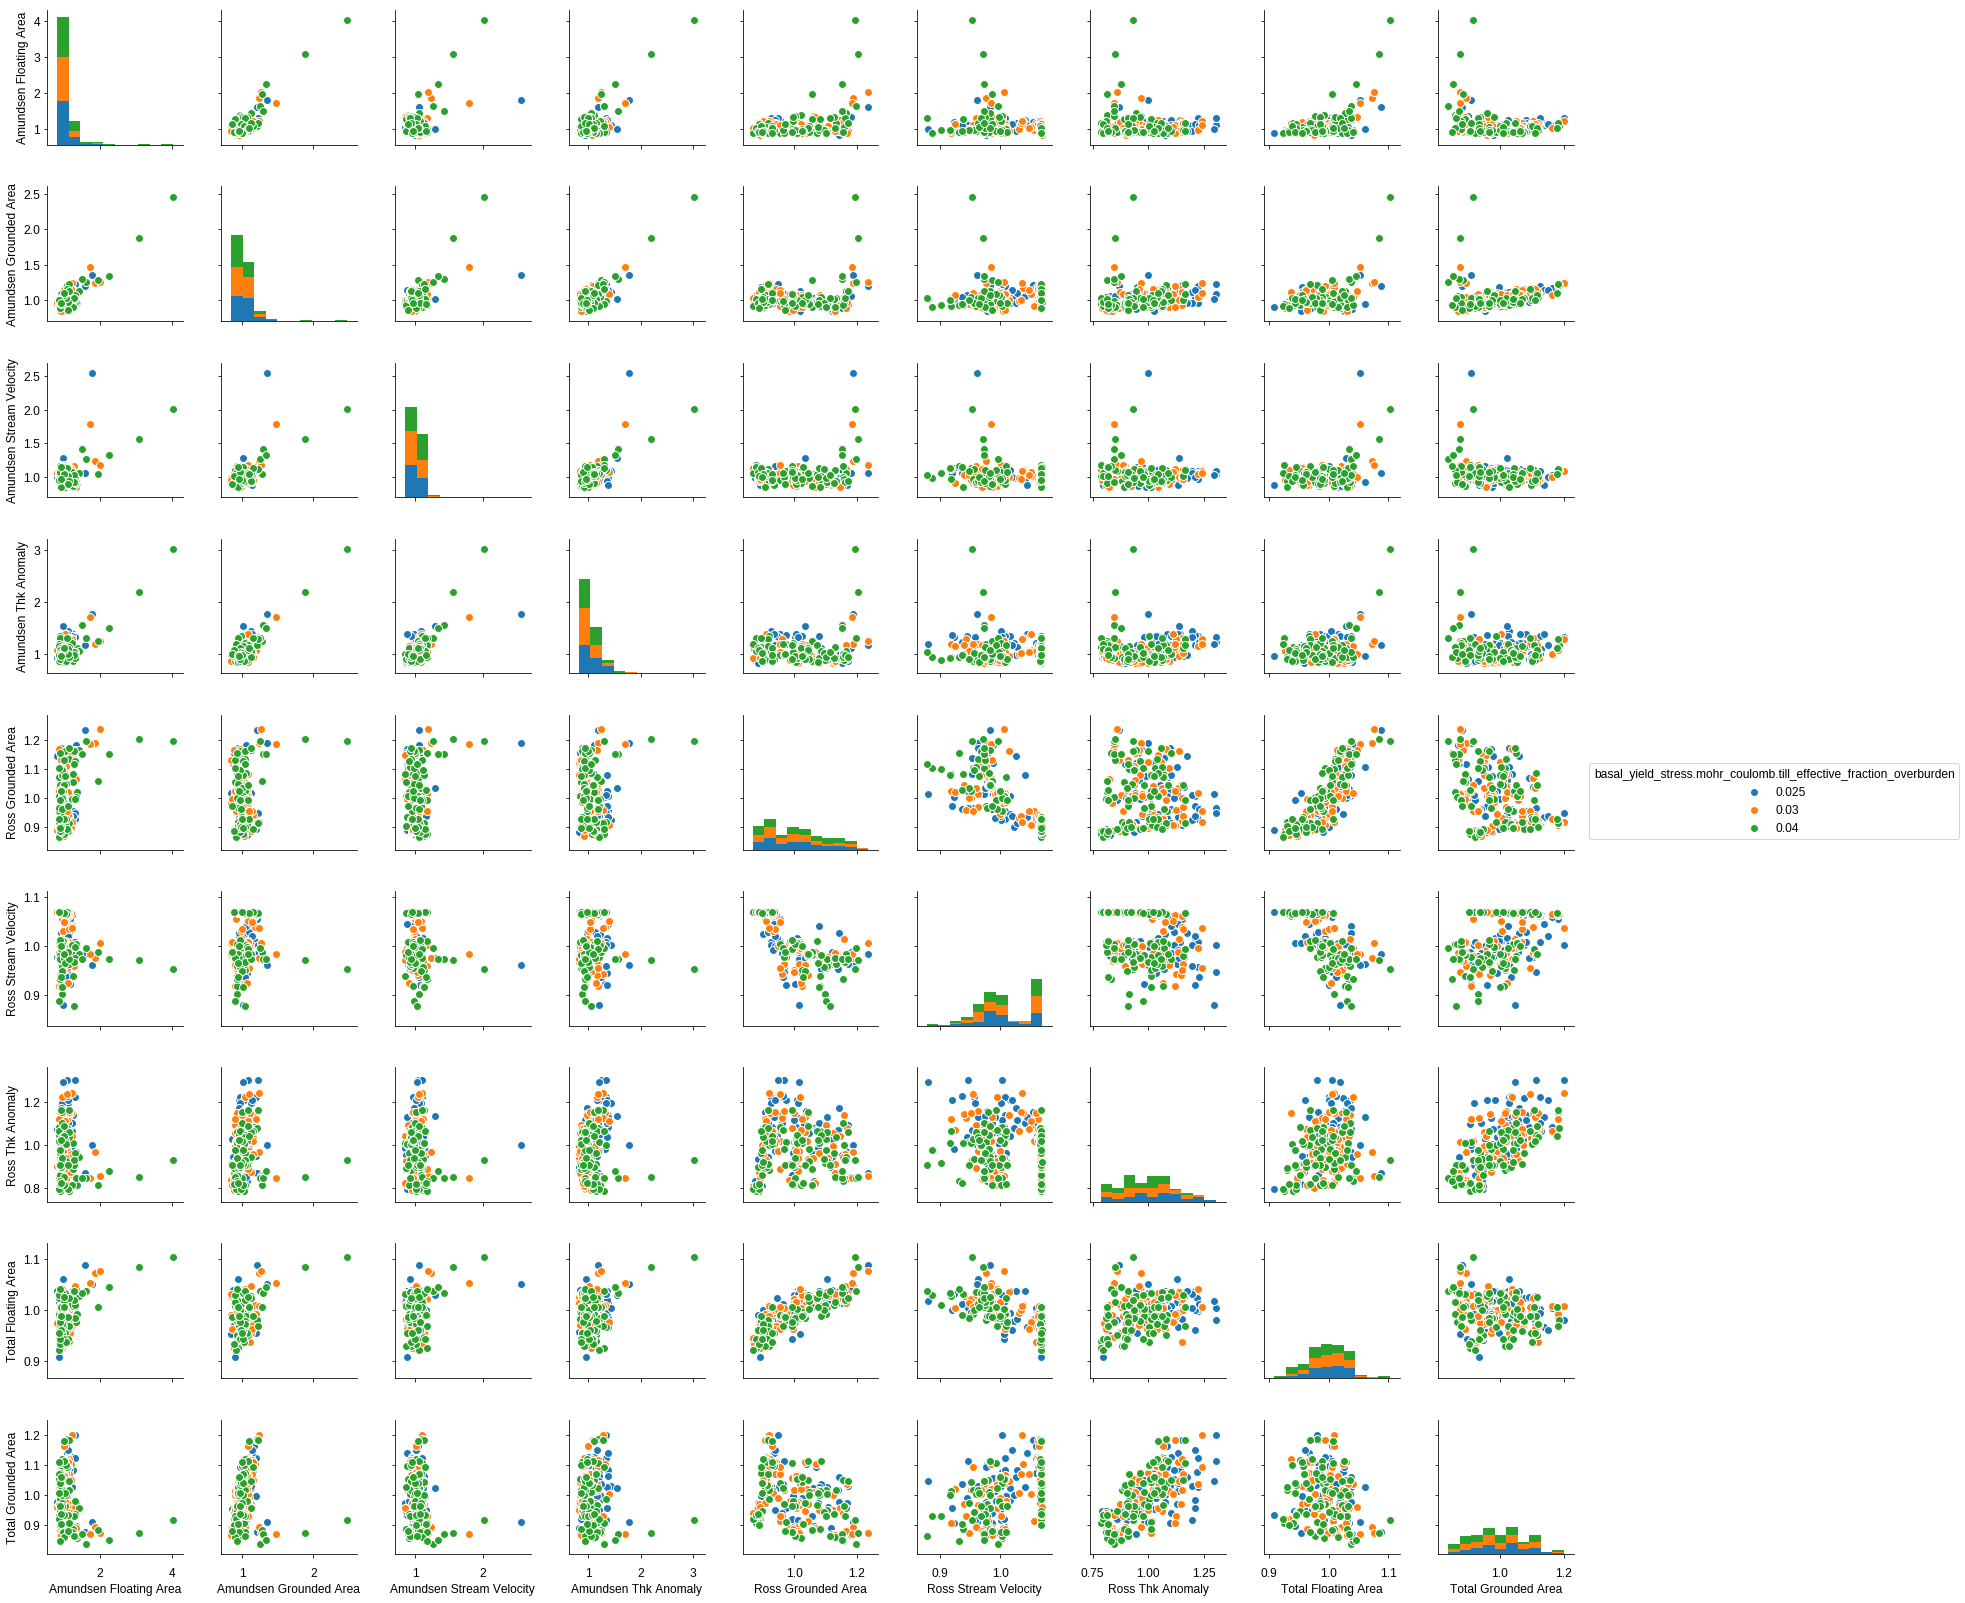

In [75]:
# overburden frac=0.25 is best for Ross streaming and grounded area.

highlight = "basal_yield_stress.mohr_coulomb.till_effective_fraction_overburden"
pp = sns.pairplot(pd.concat([normalized_ens_indicator,ensemble_table[highlight]],axis=1),hue=highlight,
             vars=sorted(normalized_ens_indicator.columns))